<a href="https://colab.research.google.com/github/mashaan14/python-tutorials/blob/main/graphs_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing graphs in Python
For a collection of points in 2D, we'll create a graph using some similarity function. Then, we will plot the graph using `NetworkX` library.

For any questions about this notebook, please email me on __[mashaan.awad@outlook.com](mailto:mashaan.awad@outlook.com)__

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.datasets import make_circles

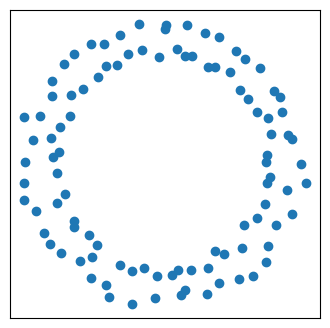

In [ ]:
X, y = make_circles(n_samples=100, noise=0.03)
fig = plt.figure(figsize=(4, 4))
plt.scatter(X[:,0], X[:,1]);
plt.tick_params(axis='both',which='both',bottom=False,top=False,left=False,right=False,
                labelbottom=False,labeltop=False,labelleft=False,labelright=False);

We will use the Gaussian kernel as a similarity metric, which is defined as:

$A_{ij}=\exp{\left(\frac{-d^2\left(i,j\right)}{\sigma}\right)}$

where $d$ is the Euclidean distance, and $\sigma$ is a global scale controlling the width of Gaussian kernel. We will compute $A$ with $\sigma = 1$

In [ ]:
# An n by n matrix, where each element represents the similarity between a pair of samples
A = np.exp((-1 * np.sqrt(np.square(X[:, None, :] - X[None, :, :]).sum(axis=-1))) / 1)
# filling the diagonal of the adjacency matrix with zeros to avoid self loops
np.fill_diagonal(A, 0)

Let's plot a histogram of all values in $A$

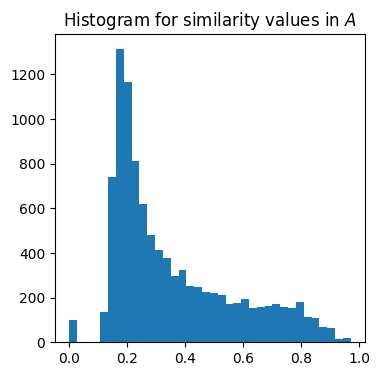

In [ ]:
fig = plt.figure(figsize=(4, 4))
plt.hist(A.flatten(), bins='auto')
plt.title("Histogram for similarity values in $A$");

If we plot all edges, we won't be able to see the graph clearly, because so many edges will overlap each other. So let's filter all edges that have a weight less than 0.8

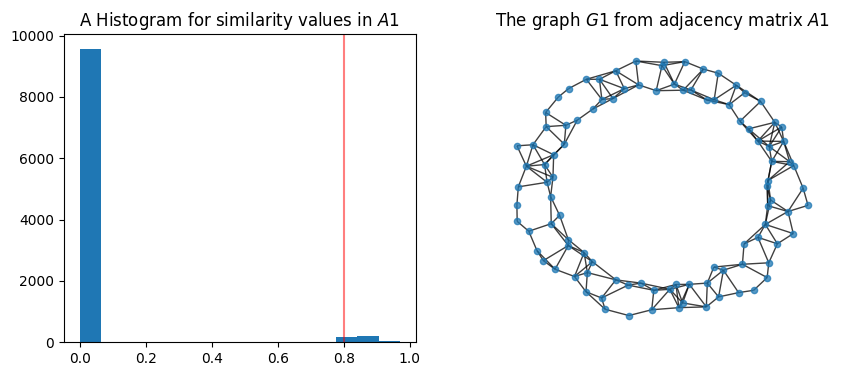

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10, 4))
A1 = np.copy(A)
A1[A1 < 0.8] = 0
ax[0].hist(A1.flatten(), bins='auto')
ax[0].axvline(x=0.8, color='r', alpha=0.5)
ax[0].set_title('A Histogram for similarity values in $A1$');

G1 = nx.from_numpy_array(A1)
nx.draw(G1, X, node_size=20, alpha=0.75)
ax[1].set_title('The graph $G1$ from adjacency matrix $A1$')
ax[1].set_axis_off()

Now let's try filtering edges with wieghts less than 0.6. We expect this graph to have more edges than the previous graph.


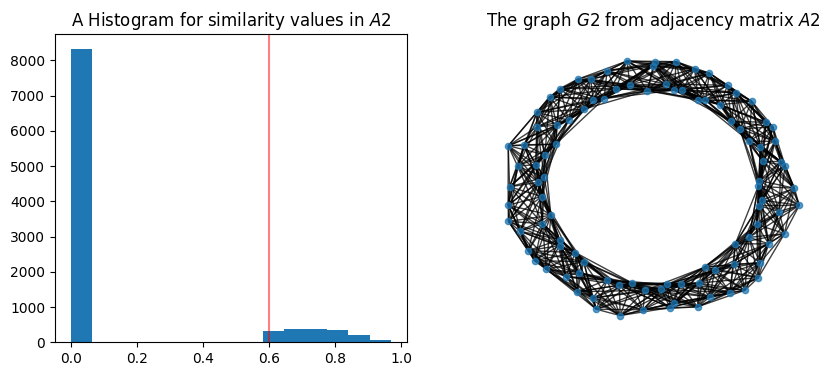

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10, 4))
A2 = np.copy(A)
A2[A2 < 0.6] = 0
ax[0].hist(A2.flatten(), bins='auto')
ax[0].axvline(x=0.6, color='r', alpha=0.5)
ax[0].set_title('A Histogram for similarity values in $A2$');

G2 = nx.from_numpy_array(A2)
nx.draw(G2, X, node_size=20, alpha=0.75)
ax[1].set_title('The graph $G2$ from adjacency matrix $A2$')
ax[1].set_axis_off()

We will clear all variables related to the adjacency matrix. Then, we will try another value for $\sigma$. This time we will set $\sigma = 2$

In [ ]:
del A, A1, A2, G1, G2

In [ ]:
# An n by n matrix, where each element represents the similarity between a pair of samples
A = np.exp((-1 * np.sqrt(np.square(X[:, None, :] - X[None, :, :]).sum(axis=-1))) / 2)
# filling the diagonal of the adjacency matrix with zeros to avoid self loops
np.fill_diagonal(A, 0)

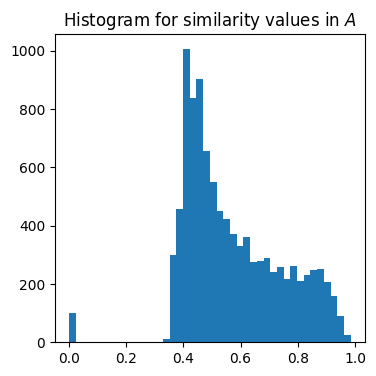

In [ ]:
fig = plt.figure(figsize=(4, 4))
plt.hist(A.flatten(), bins='auto')
plt.title("Histogram for similarity values in $A$");

We noticed that the mean of the histogram has moved from $0.2$ to around $0.4$. This is expected, because the Gaussian is so wide, it now includes more points.

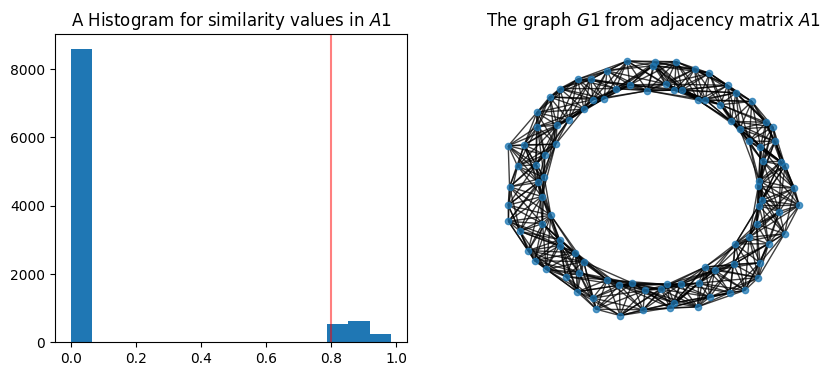

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10, 4))
A1 = np.copy(A)
A1[A1 < 0.8] = 0
ax[0].hist(A1.flatten(), bins='auto')
ax[0].axvline(x=0.8, color='r', alpha=0.5)
ax[0].set_title('A Histogram for similarity values in $A1$');

G1 = nx.from_numpy_array(A1)
nx.draw(G1, X, node_size=20, alpha=0.75)
ax[1].set_title('The graph $G1$ from adjacency matrix $A1$')
ax[1].set_axis_off()

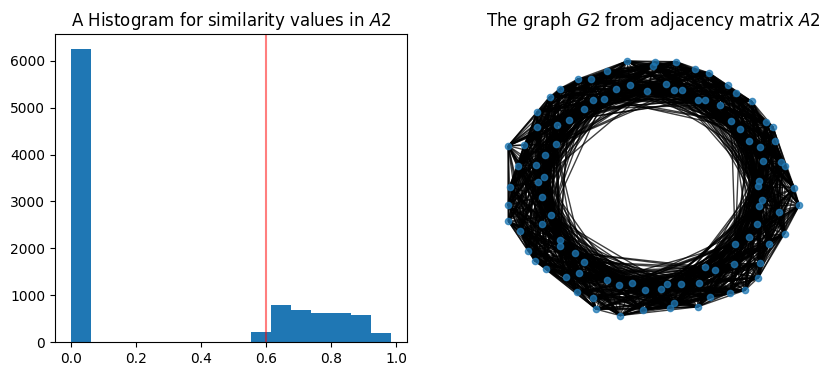

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10, 4))
A2 = np.copy(A)
A2[A2 < 0.6] = 0
ax[0].hist(A2.flatten(), bins='auto')
ax[0].axvline(x=0.6, color='r', alpha=0.5)
ax[0].set_title('A Histogram for similarity values in $A2$');

G2 = nx.from_numpy_array(A2)
nx.draw(G2, X, node_size=20, alpha=0.75)
ax[1].set_title('The graph $G2$ from adjacency matrix $A2$')
ax[1].set_axis_off()

In [ ]:
!jupyter nbconvert --to html /content/graphs_visualization.ipynb

[NbConvertApp] Converting notebook /content/graphs_visualization.ipynb to html
[NbConvertApp] Writing 1130943 bytes to /content/graphs_visualization.html
